## Hello and welcome to my Notebook

Myself - Priyanshu Jain | 22f2001329

#### Today we will explore the world of taxis using this dataset and understand what goes into predicting the prices for taxis when we try to book them and how historical data can play a role in making better and accurate predictions. 

#### We will understand the dataset then move to creating visuals to better that understanding. We will use statistical methods to know nature of dataset and fix missing values or outliers effecting our data. After that we will build different models and pick the one that works best for our data.

In [ ]:
# Loading libraries

import numpy as np # linear algebra
import pandas as pd # to handle and read datasets
import datetime # to handle time and date data

import matplotlib.pyplot as plt # to visualize data
from pandas.plotting import scatter_matrix

from sklearn.impute import KNNImputer # to fill missing values
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # to encode data which is ordered

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbours import KNeighboursRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
# Let us read the data from train.csv file
train_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

In [147]:
# We will start with inspecting the data
print(train_data.shape) # dataset contains 1,75,000 rows and 17 columns with target_amount as the 'y'
train_data.head(5)

(175000, 17)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [148]:
# Inspecting the test.csv on which we will make the predictions
print(test_data.shape) # dataset contains 50,000 rows and 16 columns
test_data.head(5)

(50000, 16)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [149]:
# From understanding of the dataset and description focus will be on predicting the total_amount.
# Before we get onto that let us understand the dataset more.

print("Columns: ", train_data.columns.values)

Columns:  ['VendorID' 'tpep_pickup_datetime' 'tpep_dropoff_datetime'
 'passenger_count' 'trip_distance' 'RatecodeID' 'store_and_fwd_flag'
 'PULocationID' 'DOLocationID' 'payment_type' 'extra' 'tip_amount'
 'tolls_amount' 'improvement_surcharge' 'total_amount'
 'congestion_surcharge' 'Airport_fee']


### From the analysis and the problem statement we can divide the columns into
#### Features
1. VendorID
2. tpep_pickup_datetime
3. tpep_dropoff_datetime
4. passenger_count
5. trip_distance
6. RatecodeID
7. store_and_fwd_flag
8. PULocationID
9. DOLocationID
10. payment_type
11. extra
12. tip_amount
13. tolls_amount
14. improvement_surcharge
15. congestion_surcharge
16. Airport_fee

#### Label
1. total_amount

In [150]:
print("Columns: ", test_data.columns.values)
print(test_data.info()) 

# Null-values: We can see that passenger_count, RatecodeID, store_and_fwd_flag, 
# congestion_surcharge, Airport_fee have 1799 null values each

# We can observe that pickup_datetime and dropoff_datetime will need to be converted to
# datetime datatype and payment_type and store_and_fwd_flag will need to be encoded into categories

Columns:  ['VendorID' 'tpep_pickup_datetime' 'tpep_dropoff_datetime'
 'passenger_count' 'trip_distance' 'RatecodeID' 'store_and_fwd_flag'
 'PULocationID' 'DOLocationID' 'payment_type' 'extra' 'tip_amount'
 'tolls_amount' 'improvement_surcharge' 'congestion_surcharge'
 'Airport_fee']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 n

In [151]:
# Let us understand the nature of train data
train_data.describe()

# Few observations - Outliers and abnormalities
# It seems trip distance's max value is way too high reaching 135182 which seems abnormal, 
# Tip amount also reaches 484 and total amount has large negative value also.
# Improvement surcharge, extra, tolls_amount, congestion_surcharge and airport fee also has negative values.

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In [152]:
# Similarly inspecting the nature of test data
test_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
count,50000.000000,48221.000000,50000.000000,48221.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,48221.000000,48221.000000
mean,0.730280,1.358309,3.999013,1.567014,132.208160,132.559300,1.918050,6.107765,0.615867,0.981354,2.255345,0.152133
std,0.444584,0.879948,78.958759,6.875115,76.483766,76.410602,1.938568,4.408572,2.289421,0.190203,0.803190,0.502866
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000409,-23.000000,-1.000000,-2.500000,-1.750000
25%,0.000000,1.000000,1.090000,1.000000,66.000000,67.000000,0.000000,3.464018,0.000000,1.000000,2.500000,0.000000
50%,1.000000,1.000000,1.850000,1.000000,132.000000,133.000000,1.000000,5.271687,0.000000,1.000000,2.500000,0.000000
75%,1.000000,1.000000,3.600000,1.000000,199.000000,199.000000,2.500000,7.504048,0.000000,1.000000,2.500000,0.000000
max,2.000000,8.000000,17624.430000,99.000000,264.000000,264.000000,11.750000,96.551343,47.750000,1.000000,2.500000,1.750000


In [153]:
# Let us inspect the data further.
# Passenger count
print("Passenger counts unique values: ", train_data.passenger_count.value_counts())
print("Passenger counts unique values: ", test_data.passenger_count.value_counts())

# Both train and test data has entries where 0 passenger count is also updated in the dataset, interesting.

Passenger counts unique values:  passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64
Passenger counts unique values:  passenger_count
1.0    36532
2.0     7155
3.0     1731
4.0     1062
0.0      781
5.0      546
6.0      413
8.0        1
Name: count, dtype: int64


(array([2.81800e+03, 1.28534e+05, 2.43160e+04, 6.01800e+03, 3.66800e+03,
        1.97000e+03, 1.59600e+03, 0.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

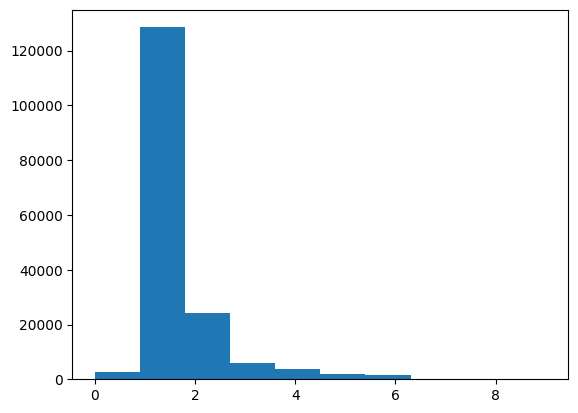

In [154]:
plt.hist(train_data.passenger_count)

(array([7.8100e+02, 3.6532e+04, 7.1550e+03, 1.7310e+03, 0.0000e+00,
        1.0620e+03, 5.4600e+02, 4.1300e+02, 0.0000e+00, 1.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

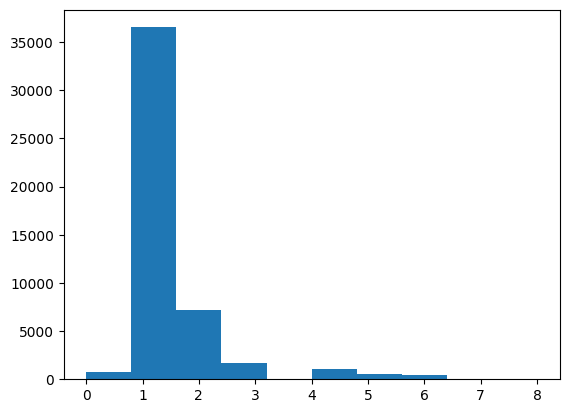

In [155]:
plt.hist(test_data.passenger_count)

In [156]:
train_data.store_and_fwd_flag.value_counts()

# We will use LabelEncoder here as there are just two categories

store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64

In [157]:
train_data.payment_type.value_counts()

# We will need to use OneHotEncoder to encode this column as there is no order in these to use OrdinalEncoder or LabelEncoder

payment_type
Credit Card    135257
Cash            30141
Wallet           6077
unknown          2333
UPI              1192
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x79a3d2a30640>,
 'caps': [<matplotlib.lines.Line2D at 0x79a3d2a30550>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a3d2a32e00>],
 'medians': [<matplotlib.lines.Line2D at 0x79a3d2a30eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a3d2a31d50>],
 'means': []}

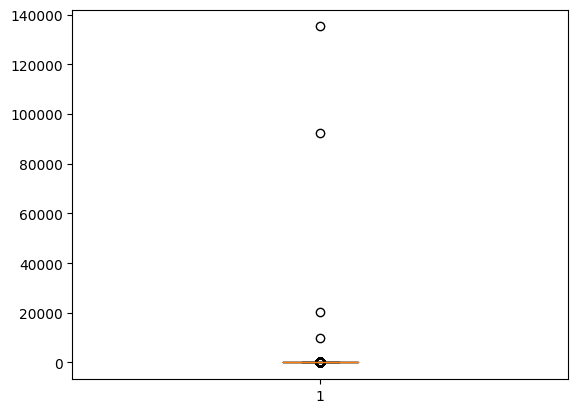

In [158]:
plt.boxplot(train_data['trip_distance'])

# There are clearly 4 outliers in the trip distance in train_data

In [159]:
Q1 = np.percentile(train_data['trip_distance'], 25, method='midpoint')
Q3 = np.percentile(train_data['trip_distance'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

upper=Q3+1.5*IQR
upper_array=np.array(train_data['trip_distance']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(train_data['trip_distance']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())
 
# Create arrays of Boolean values indicating the outlier rows
upper_array_idx = upper_array[0]
lower_array_idx = lower_array[0]
 
# Removing the outliers
# train_data.drop(index=upper_array, inplace=True)
# train_data.drop(index=lower_array, inplace=True)

# We can see that there are 24133 outliers. This could be due to the fact 
# that the passenger count has lots of variety ranging from 0-9
# with 1 being the highest in number hence most data is skewed to that

2.53
Upper Bound: 7.404999999999999
24133
Lower Bound: -2.715
0


{'whiskers': [<matplotlib.lines.Line2D at 0x79a3d0800130>,
 'caps': [<matplotlib.lines.Line2D at 0x79a3d0800670>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a3dbb461a0>],
 'medians': [<matplotlib.lines.Line2D at 0x79a3d0803a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a3d0803ca0>],
 'means': []}

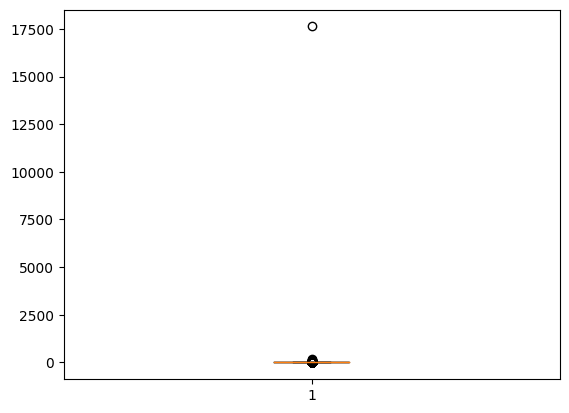

In [160]:
plt.boxplot(test_data['trip_distance'])

# There is 1 outlier in the test_data trip_distance

In [161]:
Q1 = np.percentile(test_data['trip_distance'], 25, method='midpoint')
Q3 = np.percentile(test_data['trip_distance'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

upper=Q3+1.5*IQR
upper_array=np.array(test_data['trip_distance']>=upper)
print("Upper Bound:",upper)
print("Outliers: ", upper_array.sum())
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(test_data['trip_distance']<=lower)
print("Lower Bound:",lower)
print("Outliers: ", lower_array.sum())
 
# Create arrays of Boolean values indicating the outlier rows
upper_array_idx = upper_array[0]
lower_array_idx = lower_array[0]

# We can see that using IQR there are 6717 outliers.

2.51
Upper Bound: 7.365
Outliers:  6717
Lower Bound: -2.675
Outliers:  0


In [162]:
print("RatecodeID unique: ", train_data['RatecodeID'].value_counts())
print("RatecodeID unique: ", test_data['RatecodeID'].value_counts())

# RatecodeID are discrete ranging from 1-6 and 99. 
# 6 is not present in training data and appears only once in test data.
# We will use OneHotEncoding for these

RatecodeID unique:  RatecodeID
1.0     158652
2.0       7314
5.0       1036
99.0       748
3.0        727
4.0        446
Name: count, dtype: int64
RatecodeID unique:  RatecodeID
1.0     45373
2.0      1956
5.0       314
99.0      238
3.0       216
4.0       123
6.0         1
Name: count, dtype: int64


### No null values in:
1. extra, 
2. tip_amount, 
3. tolls_amount, 
4. improvement_surcharge

### Null values in:
5. congestion_surcharge, 
6. Airport_fee

Presense of null values in congestion and airport fee could be possible as there may not always be rides that go to airport or have pickup. Also, congestion charges could be related to specific time of the day or specific to locations.

We will examine `congestion_surcharge` in more detail after we transform pickup date and time. For now let's explore `extra`, `tip_amount`, `tolls_amount`, `improvement_surcharge` and `airport_fee` 

array([[<Axes: xlabel='extra', ylabel='extra'>,
        <Axes: xlabel='tip_amount', ylabel='extra'>,
        <Axes: xlabel='tolls_amount', ylabel='extra'>,
        <Axes: xlabel='improvement_surcharge', ylabel='extra'>,
        <Axes: xlabel='total_amount', ylabel='extra'>],
       [<Axes: xlabel='extra', ylabel='tip_amount'>,
        <Axes: xlabel='tip_amount', ylabel='tip_amount'>,
        <Axes: xlabel='tolls_amount', ylabel='tip_amount'>,
        <Axes: xlabel='improvement_surcharge', ylabel='tip_amount'>,
        <Axes: xlabel='total_amount', ylabel='tip_amount'>],
       [<Axes: xlabel='extra', ylabel='tolls_amount'>,
        <Axes: xlabel='tip_amount', ylabel='tolls_amount'>,
        <Axes: xlabel='tolls_amount', ylabel='tolls_amount'>,
        <Axes: xlabel='improvement_surcharge', ylabel='tolls_amount'>,
        <Axes: xlabel='total_amount', ylabel='tolls_amount'>],
       [<Axes: xlabel='extra', ylabel='improvement_surcharge'>,
        <Axes: xlabel='tip_amount', ylabel='impr

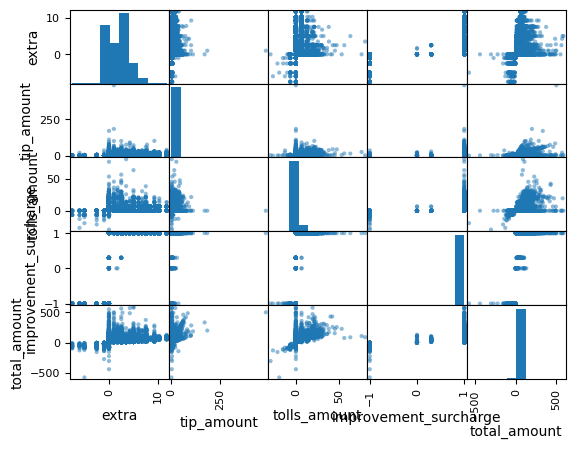

In [163]:
attribute_list = ['extra','tip_amount','tolls_amount','improvement_surcharge','total_amount']
scatter_matrix(train_data[attribute_list])

In [164]:
print(sorted(test_data.extra.value_counts().index))

# In case of extra charges they are absent in 51247 cases and present in the rest. In some cases even negative.
# We can utilize this information and add new column defining posivite, absent or negative extra charges as the column.

[-7.5, -6.0, -5.0, -2.5, -1.0, 0.0, 0.03, 1.0, 1.75, 2.5, 2.75, 3.2, 3.5, 4.25, 5.0, 5.25, 6.0, 6.75, 7.5, 7.75, 8.5, 9.25, 10.0, 10.25, 11.75]


In [165]:
test_data.extra.value_counts()

# In case of extra charges they follow a specific pattern as the increment in the value is in stages

extra
 0.00     14819
 2.50     14337
 1.00     10134
 5.00      4887
 3.50      3403
 7.50       642
 6.00       505
 4.25       235
 9.25       227
-1.00       130
-2.50       113
 2.75       106
 1.75       103
 6.75        69
 7.75        67
 11.75       64
 10.25       63
-5.00        30
 10.00       29
 8.50        18
-6.00         9
-7.50         7
 0.03         1
 5.25         1
 3.20         1
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x79a3cbeee6b0>,
 'caps': [<matplotlib.lines.Line2D at 0x79a3cbeec2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a3cbeee410>],
 'medians': [<matplotlib.lines.Line2D at 0x79a3cbeef010>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a3cbeef2b0>],
 'means': []}

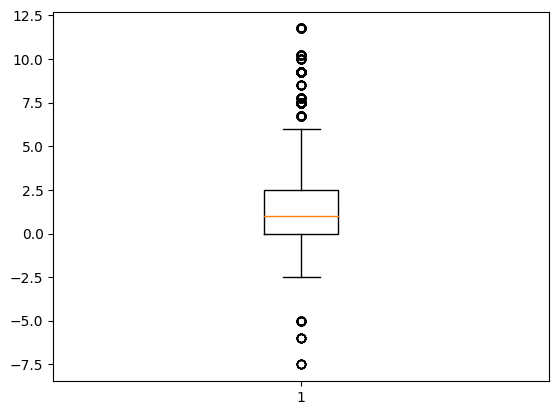

In [166]:
plt.boxplot(test_data.extra)

# It seems there are outliers in extra charges also

In [167]:
train_data.tip_amount.value_counts()

# Unlike others tip_amount are unique and continuous in nature. They are amounts of tips.

tip_amount
7.165589     1
3.850730     1
5.311822     1
9.137562     1
6.716744     1
            ..
11.560123    1
3.256321     1
6.093614     1
1.099215     1
6.541699     1
Name: count, Length: 175000, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x79a3cbd5b280>,
 'caps': [<matplotlib.lines.Line2D at 0x79a3cbd5b7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a3cbd5a6e0>],
 'medians': [<matplotlib.lines.Line2D at 0x79a3cbd5bd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a3cbd5bfa0>],
 'means': []}

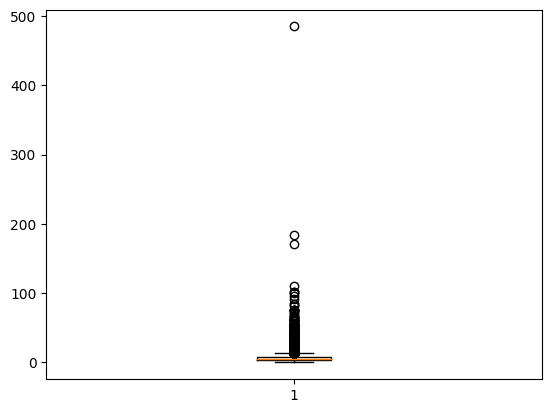

In [168]:
plt.boxplot(train_data.tip_amount)

# Similarly there are outliers in tip_amount aswell.

In [169]:
train_data.tolls_amount.value_counts()
# tolls amount has a 0 value in 159328 of the cases and in others its present.
# Maybe we can create a column which is categorical and defines if tolls_amount is present or absent.

tolls_amount
0.00     159328
6.55      14011
12.75       254
14.75       209
3.00        132
          ...  
63.00         1
18.64         1
15.10         1
20.50         1
14.99         1
Name: count, Length: 214, dtype: int64

In [170]:
train_data.improvement_surcharge.value_counts()

# improvement surcharge is 1 in 173145 cases -1 in 1725 cases and 0.3 and 0 in very few cases.

improvement_surcharge
 1.0    173145
-1.0      1725
 0.3        85
 0.0        45
Name: count, dtype: int64

In [171]:
test_data.improvement_surcharge.value_counts()

# similar four distinct values exist for the test data improvement surcharge.
# It can be observed that these surcharges are in dollars

improvement_surcharge
 1.0    49509
-1.0      450
 0.3       29
 0.0       12
Name: count, dtype: int64

In [172]:
train_data.congestion_surcharge.value_counts()

# Similarly congestion_surcharges are either present, absent or negative. 
# These figures seem to be percentage charges.

congestion_surcharge
 2.5    153212
 0.0     14325
-2.5      1386
Name: count, dtype: int64

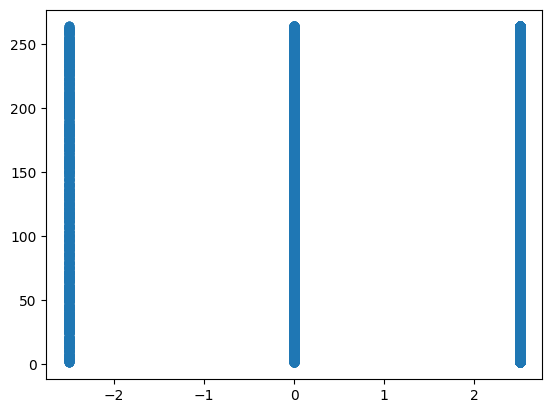

In [173]:
plt.scatter(train_data.congestion_surcharge, train_data.PULocationID)

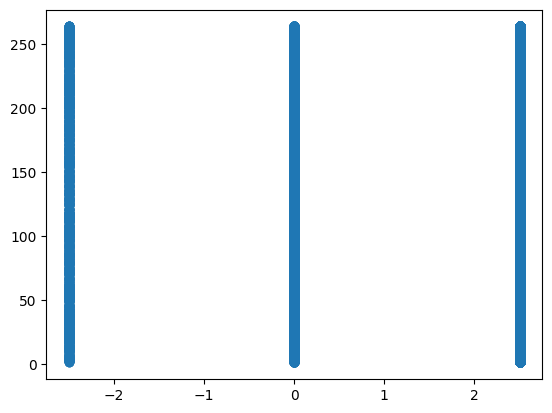

In [174]:
plt.scatter(train_data.congestion_surcharge, train_data.DOLocationID)

In [175]:
train_data.Airport_fee.value_counts()

# Here either the airport fee is in dollars or it is in percentage of total_amount. 
# Lets look at total_amount to come to a conclusion.

Airport_fee
 0.00    153074
 1.75     15590
-1.75       259
Name: count, dtype: int64

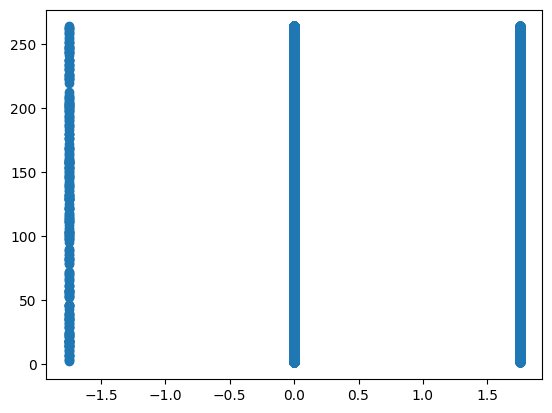

In [176]:
plt.scatter(train_data.Airport_fee, train_data.PULocationID)

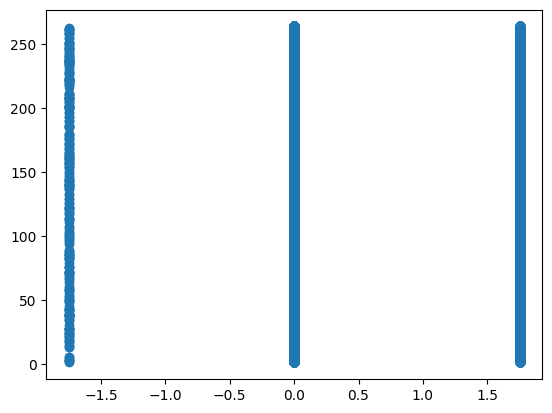

In [177]:
plt.scatter(train_data.Airport_fee, train_data.DOLocationID)

# There is no specific correlation between Airport_fee and the pickup or dropoff location ID

In [178]:
train_data.total_amount.describe()

# Based on the data it is still unclear why some of the values are negative let us explore these values more.

count    175000.000000
mean         29.633901
std          25.425206
min        -576.750000
25%          16.300000
50%          21.450000
75%          31.800000
max         587.250000
Name: total_amount, dtype: float64

In [179]:
train_data[train_data.Airport_fee<0].total_amount.describe()

# It seems the values where Airport fee is negative total_amount is also negative

count    259.000000
mean     -58.649498
std       47.511107
min     -576.750000
25%      -82.300000
50%      -61.200000
75%      -27.600000
max       -3.250000
Name: total_amount, dtype: float64

In [180]:
train_data[train_data.congestion_surcharge<0].total_amount.describe()

# Similar story is there in case when congestion_surcharge is negative.
# Could it be that the values are marked negative as the ride was offered entirely at discount to the customer.
# Or it could be that refund was issued for the ride to customer.

count    1386.000000
mean      -24.735909
std        22.015348
min      -223.500000
25%       -25.900000
50%       -16.500000
75%       -12.200000
max        -4.000000
Name: total_amount, dtype: float64

In [181]:
print("Total count total_amount with negative values in training data:", (train_data.total_amount<0).sum())

# In only 1725 cases total_amount was negative in the entire dataset.
# We can experiment in these cases by changing the signs for these values and same thing for 
# the charges that are associated with these cases. Our model is for predicting the total_amount 
# and not for taking discount or refund into consideration.

Total count total_amount with negative values in training data: 1725


## Data Exploration Summary

### About Dataset
1. We have 16 columns for prediction and 1 target variable called `total_amount`.
2. Training dataset has 175000 rows and 17 columns in total.
3. Test dataset has 50000 rows and 16 columns in total.

### Null Values
1. passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, Airport fee. These are the columns with null values which are equal in number for each.
2. Total null value count 6077 which makes up about 3.47% of training data.
3. Test data has similar story for the same columns with 1779 null rows making about 3.55% of data.

### Outliers
1. There are outliers in `trip_distance` which will be handled using QuantileTransformer or RobustScaler
2. `extra` and `tip_amount` also has outliers which need to handled.

### Required Feature Engineering
1. `tpep_pickup_datetime` and `tpep_dropoff_datetime` will we converted to datetime
2. `trip_duration` will be calculated
3. `pick_time_of_day` and `drop_time_of_day` the hour specifically will be extracted and used for prediction. Data Exploration using Tableau gave this insight that if a polynomial of degree 8 is used for the prediction it leads to higher correlation. We will see how we can use this.
4. `store_and_fwd_flag` will be encoded into categories
5. `payment_type` will be encoded using OneHotEncoder
6. Negative values in various charges to be changed to positive values.
7. `extra` can be used to create column with present or absent extra charges categorical column
8. `tolls_amount` can be used to create column with tolls_present where 0 means no toll and vice versa.
9. `improvement_surcharge` negative values to be changed to positive and used as percentages.
10. `congestion_surcharge` negative values to be chaged to positive and used as percentages.
11. `congestion_surcharge` null values to be filled, here we can explore the correlation of pickup location with congestion, pickup time with congestion, trip duration and distance with congestion to understand which better correlates with congestion. Based on that we may take a call on how to fill the missing values.
12. `Airport_fee` negative values to be changed to positive values.
13. `Airport_fee` can also be used to create a categorical column with present or absent airport fee.
14. `Airport_fee` can be considered 0 when the airport fee is missing. There is no correlation between fee and location.
15. We will also experiment with `total_amount` and convert the negative values to positive in order to make prediction as it could lead to better 
    prediction.
16. Alternate approach - that can be explored is to calculate the `gross_charges` which are solely calculated based on the ride distance and probably duration. Other charges such as `extra`, `tolls_amount`, `improvement_surcharge`, `congestion_surcharge`, `Airport_fee` can then be added to that to calculate the `total_amount`.

### Required scaling
1. We will definitely need to use scaling to scale the data it will remove the effect of outliers also in the data.
2. `trip_distance` has outliers which can be fixed using RobustScaler or QuantileTransformer
3. `extra` and `tip_amount` has outliers which can be fixed only if we are going to use them for prediction. But if we use alternate approach then we do not need to scale them.

## Feature Transformation
### Calculate trip_duration
Pickup time and Dropoff time can give us very good information
1. Information on trip duration by taking difference of dropoff and pickup time
2. Time of day when trip was started and ended also may have some correlation to the prices charged
3. We can use duration to calculate speed of travel as we have the trip distance. It can give us idea of whether traffic or waiting times have correlation to charges. Slow average speeds could mean more overall charges or congestion_surcharge.

train_data.payment_type.value_counts()

In [182]:
# Saving a copy of train and test 
raw_train = train_data.copy()
raw_test = test_data.copy()

In [183]:
# Converting datetime strings to datetime objects in both train and test data
train_data.tpep_pickup_datetime = pd.to_datetime(train_data.tpep_pickup_datetime)
train_data.tpep_dropoff_datetime = pd.to_datetime(train_data.tpep_dropoff_datetime)

# Doing the same for test set
test_data.tpep_pickup_datetime = pd.to_datetime(test_data.tpep_pickup_datetime)
test_data.tpep_dropoff_datetime = pd.to_datetime(test_data.tpep_dropoff_datetime)


# calculating the duration of trip and converting to minutes using datetime.timedelta.total_seconds
train_data['trip_duration'] = pd.DataFrame(map(datetime.timedelta.total_seconds,(train_data.tpep_dropoff_datetime - train_data.tpep_pickup_datetime)))/60

# Performing same for test data
test_data['trip_duration'] = pd.DataFrame(map(datetime.timedelta.total_seconds,(test_data.tpep_dropoff_datetime - test_data.tpep_pickup_datetime)))/60


print("Train Data negative trip durations", train_data.trip_duration[train_data.trip_duration<0].count())
# Strangely in 65674 cases time duration is negative

print("Test Data negative trip durations", test_data.trip_duration[test_data.trip_duration<0].count())
# Similarly in 18578 cases time duration is negative

Train Data negative trip durations 65674
Test Data negative trip durations 18578


In [184]:
# Replacing the negative values by positive values by reversing the signs for them.
train_data.loc[train_data['trip_duration'] < 0,'trip_duration'] = train_data.loc[train_data['trip_duration'] < 0,'trip_duration']*(-1)

# Repeating same for the test data values
test_data.loc[test_data['trip_duration'] < 0,'trip_duration'] = test_data.loc[test_data['trip_duration'] < 0,'trip_duration']*(-1)

### Calculate pick_time_of_day and drop_time_of_day

In [185]:
# Extracting time of the day only the hour from datetime data for pickup and dropoff

train_data['pick_time_of_day'] = train_data['tpep_pickup_datetime'].dt.hour
train_data['drop_time_of_day'] = train_data['tpep_dropoff_datetime'].dt.hour

# Performing same for test data
test_data['pick_time_of_day'] = test_data['tpep_pickup_datetime'].dt.hour
test_data['drop_time_of_day'] = test_data['tpep_dropoff_datetime'].dt.hour

### Converting negative to positive in charges

In [186]:
# extra
train_data.loc[train_data['extra'] < 0,'extra'] = train_data.loc[train_data['extra'] < 0,'extra']*(-1)
test_data.loc[test_data['extra'] < 0,'extra'] = test_data.loc[test_data['extra'] < 0,'extra']*(-1)

# tolls_amount
train_data.loc[train_data['tolls_amount'] < 0,'tolls_amount'] = train_data.loc[train_data['tolls_amount'] < 0,'tolls_amount']*(-1)
test_data.loc[test_data['tolls_amount'] < 0,'tolls_amount'] = test_data.loc[test_data['tolls_amount'] < 0,'tolls_amount']*(-1)

# improvement_surcharge
train_data.loc[train_data['improvement_surcharge'] < 0,'improvement_surcharge'] = train_data.loc[train_data['improvement_surcharge'] < 0,'improvement_surcharge']*(-1)
test_data.loc[test_data['improvement_surcharge'] < 0,'improvement_surcharge'] = test_data.loc[test_data['improvement_surcharge'] < 0,'improvement_surcharge']*(-1)

# Replacing 0.3 with 0 for both train and test data
train_data.loc[train_data['improvement_surcharge'] == 0.3,'improvement_surcharge'] = 0
test_data.loc[test_data['improvement_surcharge'] == 0.3,'improvement_surcharge'] = 0


# congestion_surcharge
train_data.loc[train_data['congestion_surcharge'] < 0,'congestion_surcharge'] = train_data.loc[train_data['congestion_surcharge'] < 0,'congestion_surcharge']*(-1)
test_data.loc[test_data['congestion_surcharge'] < 0,'congestion_surcharge'] = test_data.loc[test_data['congestion_surcharge'] < 0,'congestion_surcharge']*(-1)

# Airport_fee
train_data.loc[train_data['Airport_fee'] < 0,'Airport_fee'] = train_data.loc[train_data['Airport_fee'] < 0,'Airport_fee']*(-1)
test_data.loc[test_data['Airport_fee'] < 0,'Airport_fee'] = test_data.loc[test_data['Airport_fee'] < 0,'Airport_fee']*(-1)

### Filling null values with 0 for the required charges

In [187]:
train_data.Airport_fee.fillna(0, inplace=True)
test_data.Airport_fee.fillna(0, inplace=True)

train_data.congestion_surcharge.fillna(0, inplace=True)
test_data.congestion_surcharge.fillna(0, inplace=True)

In [188]:
# Checking the transformations for data

print(train_data.improvement_surcharge.value_counts())
print(test_data.improvement_surcharge.value_counts())
print("##############################################\n")
print(train_data.congestion_surcharge.value_counts())
print(test_data.congestion_surcharge.value_counts())
print("##############################################\n")
print(train_data.Airport_fee.value_counts())
print(test_data.Airport_fee.value_counts())
print("##############################################")

improvement_surcharge
1.0    174870
0.0       130
Name: count, dtype: int64
improvement_surcharge
1.0    49959
0.0       41
Name: count, dtype: int64
##############################################

congestion_surcharge
2.5    154598
0.0     20402
Name: count, dtype: int64
congestion_surcharge
2.5    44222
0.0     5778
Name: count, dtype: int64
##############################################

Airport_fee
0.00    159151
1.75     15849
Name: count, dtype: int64
Airport_fee
0.00    45654
1.75     4346
Name: count, dtype: int64
##############################################


In [189]:
# Since there are seperate amounts also mentioned we will calculate and keep net_amount = total_amount -extra -tip_amount -tolls_amount -improvement_surcharge -congestion_surcharge -Airport_fee
train_data['gross_amount'] = train_data['total_amount']-train_data['extra']-train_data['tip_amount']-train_data['tolls_amount']-train_data['improvement_surcharge']-train_data['congestion_surcharge']-train_data['Airport_fee']
print(train_data.columns)
train_data.head()

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'trip_duration',
       'pick_time_of_day', 'drop_time_of_day', 'gross_amount'],
      dtype='object')


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration,pick_time_of_day,drop_time_of_day,gross_amount
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,...,7.165589,0.0,1.0,20.64,2.5,0.0,45.600000,17,16,7.474411
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,...,6.067401,0.0,1.0,25.55,2.5,0.0,63.433333,23,22,12.482599
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,...,4.111547,0.0,1.0,17.64,2.5,0.0,53.650000,10,11,10.028453
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,...,6.411079,0.0,1.0,12.80,2.5,0.0,56.866667,13,14,0.388921
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,...,4.769377,0.0,1.0,18.00,2.5,0.0,18.833333,22,22,8.730623


### Two quick models

After all this feature engineering let us build a simple model to predict the gross_amount with just trip_distance as the predictor and linear_regression.
I will also use RandomForestRegressor as in the past that model gave me an accuracy of 93.949% for test data.

In [190]:
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators = 100)

In [196]:
lr.fit(np.array(train_data.trip_distance).reshape(-1,1), np.array(train_data.gross_amount).reshape(-1,1))

lr.score(np.array(train_data.trip_distance).reshape(-1,1), np.array(train_data.gross_amount).reshape(-1,1))

0.00011001962447299007

In [195]:
rfr.fit(np.array(train_data.trip_distance).reshape(-1,1), np.array(train_data.gross_amount).reshape(-1,1))

rfr.score(np.array(train_data.trip_distance).reshape(-1,1), np.array(train_data.gross_amount).reshape(-1,1))

/tmp/ipykernel_32/3744812536.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(np.array(train_data.trip_distance).reshape(-1,1), np.array(train_data.gross_amount).reshape(-1,1))


0.7602405146640898

In [ ]:
# Let us scale trip_distance and try again

In [ ]:
# We will need to convert the labels to numerical before we can use KNN imputer

oe_1 = OrdinalEncoder()
oe_2 = OrdinalEncoder()

train_data['store_and_fwd_flag'] = oe_1.fit_transform(train_data['store_and_fwd_flag'].values.reshape(-1,1))
test_data['store_and_fwd_flag'] = oe_1.transform(test_data['store_and_fwd_flag'].values.reshape(-1,1))

train_data['payment_type'] = oe_2.fit_transform(train_data['payment_type'].values.reshape(-1,1))
test_data['payment_type'] = oe_2.transform(test_data['payment_type'].values.reshape(-1,1))

train_data['store_and_fwd_flag'].unique(),train_data['payment_type'].unique(),test_data['store_and_fwd_flag'].unique(),test_data['payment_type'].unique()

In [ ]:
train_data.info()

## Some more Graphs to understand calculated fields

## Missing Value Treatment

In [ ]:
# Using KNNImputer to fill in the filling missing values with n_neighbors = 5

imputer_1 = KNNImputer(n_neighbors=5)
train_data_knn = imputer_1.fit_transform(train_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1))
train_data_knn

In [ ]:
# Using KNNImputer to fill in the filling missing values with n_neighbors = 5

test_data_knn = imputer_1.transform(test_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1))
test_data_knn

In [ ]:
# creating a dataframe back from the output of the KNNImputer
train_data_copy = train_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1)
train_data_copy.iloc[:,:] = pd.DataFrame(train_data_knn)
train_data_copy.info()

In [ ]:
# creating a dataframe back from the output of the KNNImputer
test_data_copy = test_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1)
test_data_copy.iloc[:,:] = pd.DataFrame(test_data_knn)
test_data_copy.info()

## Find and Treat Outliers

## Scaling Features

## Splitting the train_data

In [ ]:
X = train_data_copy.drop(['total_amount','net_amount'],axis=1)
y = train_data_copy['total_amount']

In [ ]:
# splitting the data for training and testing


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building
### Linear Model

In [ ]:
# first base model using DummyRegressor


dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train,y_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_test,y_test)

In [ ]:

linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
linear_regressor.predict(X_test)
linear_regressor.score(X_test,y_test)

In [ ]:
linear_regressor.coef_

In [ ]:
submission = linear_regressor.predict(test_data_copy)
my_submission = pd.DataFrame({'ID': range(1,50001), 'total_amount': submission})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

### Testing Linear Model

In [ ]:
regr = RandomForestRegressor(n_estimators=50)
regr.fit(X_train,y_train)
regr.predict(X_test)
regr.score(X_test,y_test)

# 100 estimators - 0.9583965044644674
# 1000 estimators - 0.9583448385695726

In [ ]:
submission = regr.predict(test_data_copy)
my_submission = pd.DataFrame({'ID': range(1,50001), 'total_amount': submission})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_2.csv', index=False)